In [184]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy.stats import sem, ttest_ind,linregress

In [185]:
housing_file = "housingincome_region.csv"
housing_v_income_region = pd.read_csv(housing_file)
housing_v_income_region.head()

,Date,West Income,NorthEast Income,South Income,MidWest Income,NorthEast HP,MidWest HP,West HP,South HP,Avg West HP Chg,...,Avg NorthEast HP Chg (Norm),NorthEast Income Chg (Norm),Avg MidWest HP Chg,MidWest Income Chg,Avg MidWest HP Chg (Norm),MidWest Income Chg (Norm),Avg South HP Chg,South Income Chg,Avg South HP Chg (Norm),South Income Chg (Norm)
0,1976,68904,67903,60730,69804,50125,48725,51925,43775,0.174110,...,-0.003299,-0.014752,0.125289,0.041866,0.074816,0.031999,0.106128,0.032929,0.053151,0.021739
1,1977,69769,70404,62512,69577,54600,55325,61275,48025,0.180067,...,0.024007,0.024240,0.135454,-0.003252,0.084982,-0.013119,0.097087,0.029343,0.044110,0.018153
2,1978,73517,71273,64365,71526,62800,64350,70650,55650,0.152999,...,0.084913,-0.000248,0.163127,0.028012,0.112655,0.018145,0.158771,0.029642,0.105794,0.018453
3,1979,75181,73252,64740,72311,72050,72950,82875,63525,0.173036,...,0.082023,0.015175,0.133644,0.010975,0.083172,0.001108,0.141509,0.005826,0.088532,-0.005363
4,1980,73106,70516,63034,69152,79475,74475,89875,69100,0.084465,...,0.037784,-0.049942,0.020905,-0.043686,-0.029568,-0.053554,0.087761,-0.026352,0.034784,-0.037541


TypeError: 'builtin_function_or_method' object is not subscriptable

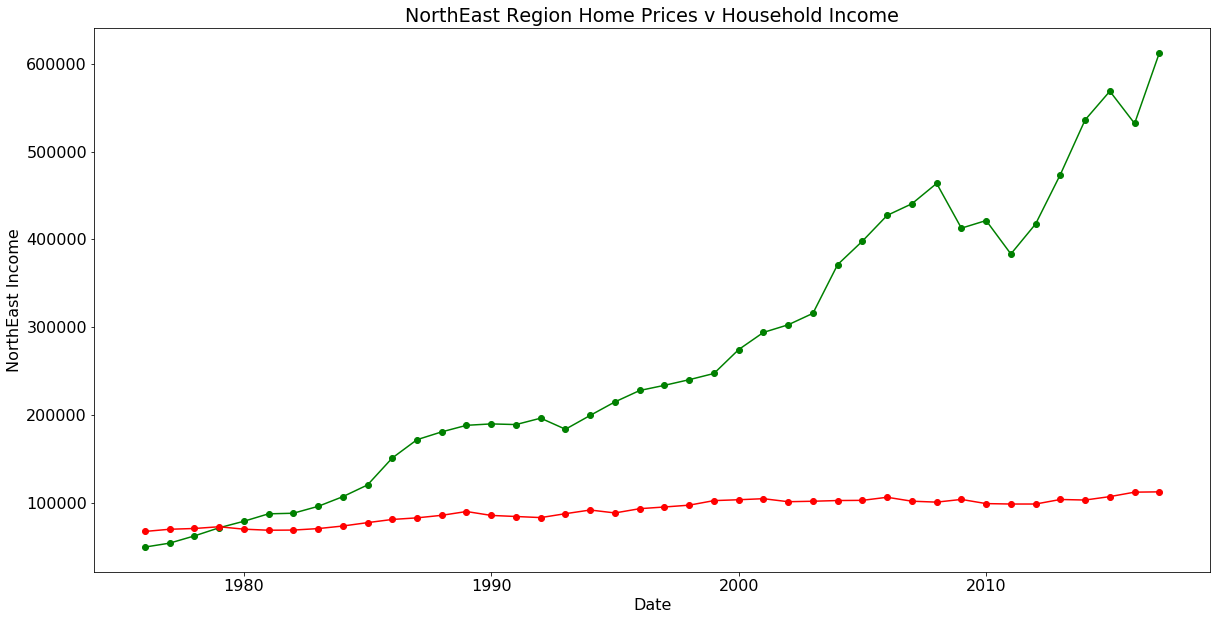

In [186]:

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# yearsFmt = mdates.DateFormatter('%Y')


fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("NorthEast Income")
plt.title("NorthEast Region Home Prices v Household Income")


NEHP = housing_v_income_region["NorthEast HP"]
NEI = housing_v_income_region["NorthEast Income"]


x_axis1 = housing_v_income_region["Date"]

NEHP_trend = plt.plot(x_axis1,NEHP,color='g',marker = "o")
NEI_trend = plt.plot(x_axis1,NEI,color='r',marker = "o")

plt.savefig("NE Vs Income.jpg")

ax.set_xlim(len["Date"])

fig1.autofmt_xdate()
plt.legend(loc="best")



In [162]:
# fig1 = plt.gcf()
# plt.show()
# plt.draw()
# fig1.savefig('NE Vs Income.png', dpi=100)


#  plt.savefig("NE Vs Income.jpg")
# # plt.show()



<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [83]:
housing_v_income_region["NorthEast HP"].corr(housing_v_income_region["NorthEast Income"])

0.9049753354900574

In [84]:
stats.ttest_ind(housing_v_income_region["NorthEast HP"], 
                 housing_v_income_region["NorthEast Income"],
                 equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=7.249948903451887, pvalue=2.0925939764313356e-10)

In [85]:
stats.ttest_ind(housing_v_income_region["NorthEast HP"], housing_v_income_region["NorthEast Income"], axis=0, equal_var=False)

Ttest_indResult(statistic=7.249948903451887, pvalue=6.733908901331057e-09)

In [86]:
stats.f_oneway(housing_v_income_region["NorthEast HP"], housing_v_income_region["NorthEast Income"])

F_onewayResult(statistic=52.561759102663274, pvalue=2.092593976431308e-10)

In [87]:
stats.chisquare(housing_v_income_region["NorthEast HP"], housing_v_income_region["NorthEast Income"])

Power_divergenceResult(statistic=21089347.792333677, pvalue=0.0)

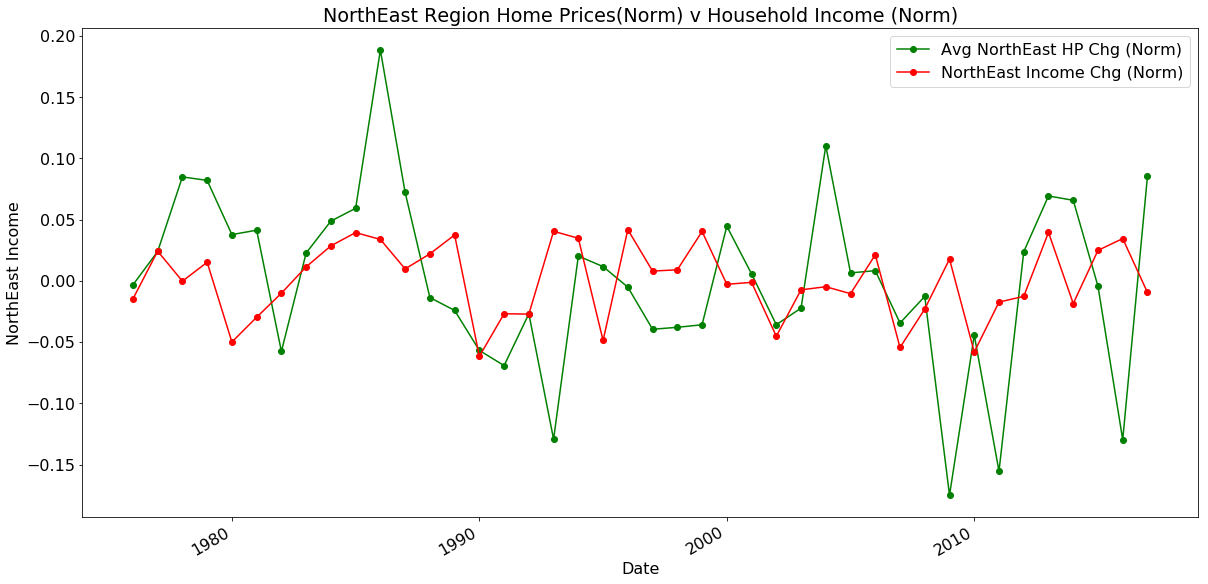

In [173]:
plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# yearsFmt = mdates.DateFormatter('%Y')


fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("NorthEast Income")
plt.title("NorthEast Region Home Prices(Norm) v Household Income (Norm)")

data_HPW = housing_v_income_region["Avg NorthEast HP Chg (Norm)"]
Inc_W = housing_v_income_region["NorthEast Income Chg (Norm)"]


x_axis1 = housing_v_income_region["Date"]

MWI_trend = plt.plot(x_axis1,data_HPW,color='g',marker = "o")
MWHP_trend = plt.plot(x_axis1,Inc_W,color='r',marker = "o")

plt.savefig("NE Vs Income(Norm).jpg")

fig1.autofmt_xdate()

plt.legend(loc="best")

In [89]:
housing_v_income_region["NorthEast Income Chg (Norm)"].corr(housing_v_income_region["Avg NorthEast HP Chg (Norm)"])



0.10368327318093802

In [90]:
linregress(housing_v_income_region["NorthEast Income Chg (Norm)"], housing_v_income_region["Avg NorthEast HP Chg (Norm)"])



LinregressResult(slope=0.24123321663554567, intercept=8.291586696520504e-11, rvalue=0.10368327318093801, pvalue=0.5134786242210739, stderr=0.3658907194603212)

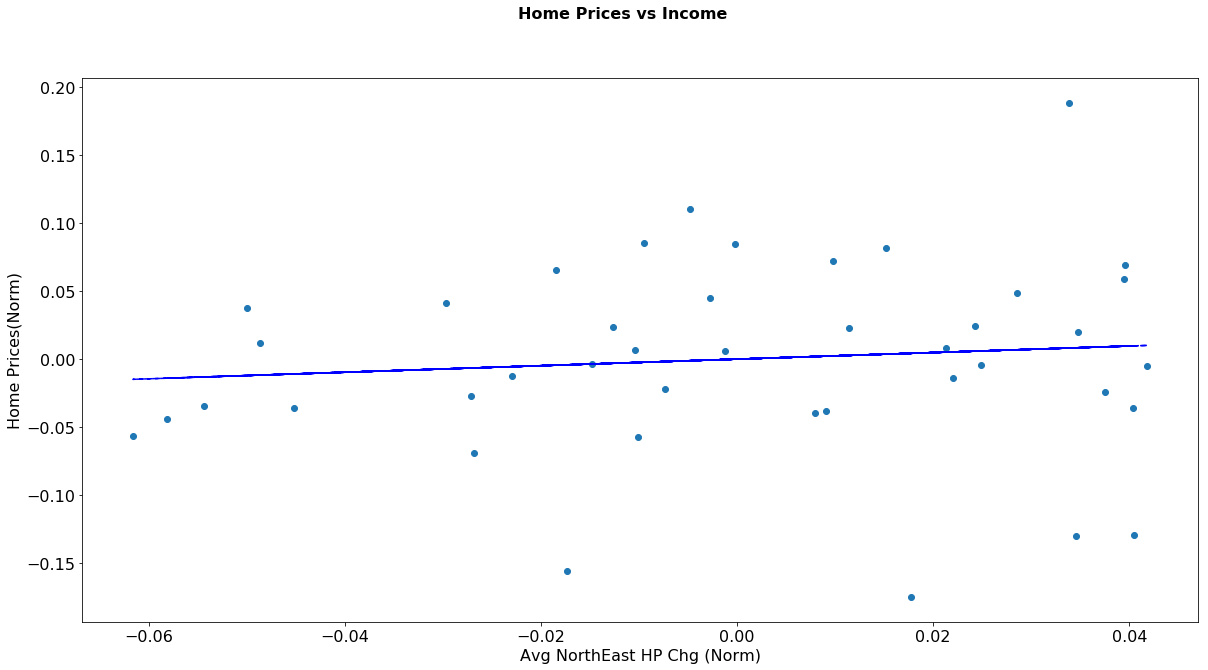

In [91]:
x_axis = housing_v_income_region["NorthEast Income Chg (Norm)"]
y_axis = housing_v_income_region["Avg NorthEast HP Chg (Norm)"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Home Prices vs Income", fontsize=16, fontweight="bold")

# ax.set_xlim(0, 2750)
# ax.set_ylim(60000, 400000)

ax.set_xlabel("Avg NorthEast HP Chg (Norm)")
ax.set_ylabel("Home Prices(Norm)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

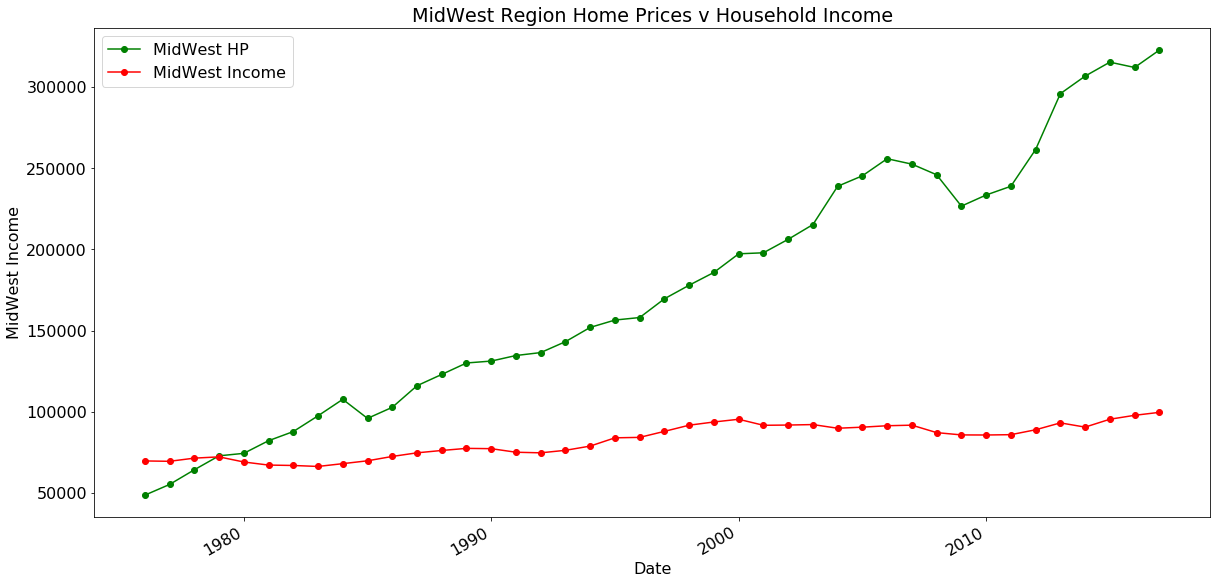

In [174]:
 #MIDWEST




plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# yearsFmt = mdates.DateFormatter('%Y')



fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("MidWest Income")
plt.title("MidWest Region Home Prices v Household Income")

MWHP = housing_v_income_region["MidWest HP"]
MWI = housing_v_income_region["MidWest Income"]


x_axis1 = housing_v_income_region["Date"]

MWHP_trend = plt.plot(x_axis1,MWHP,color='g',marker = "o")
MWI_trend = plt.plot(x_axis1,MWI,color='r',marker = "o")


plt.savefig("MW Vs Income.jpg")

fig1.autofmt_xdate()


plt.legend(loc="best")

In [124]:
housing_v_income_region["MidWest Income"].corr(housing_v_income_region["MidWest HP"])

0.9016640812020873

In [93]:
stats.f_oneway(housing_v_income_region["MidWest HP"], housing_v_income_region["MidWest Income"])

F_onewayResult(statistic=57.2075675787015, pvalue=5.080184377408186e-11)

In [94]:
 stats.chisquare(housing_v_income_region["MidWest HP"], housing_v_income_region["MidWest Income"])

Power_divergenceResult(statistic=6238510.300290037, pvalue=0.0)

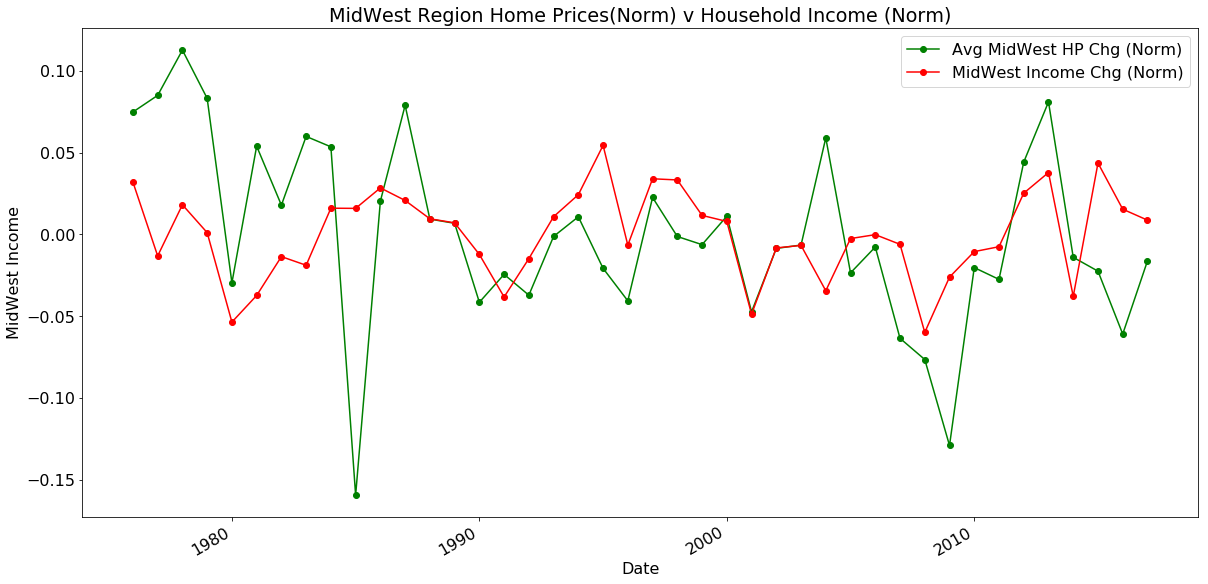

In [175]:
plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# yearsFmt = mdates.DateFormatter('%Y')


fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("MidWest Income")
plt.title("MidWest Region Home Prices(Norm) v Household Income (Norm)")

data_HPW = housing_v_income_region["Avg MidWest HP Chg (Norm)"]
Inc_W = housing_v_income_region["MidWest Income Chg (Norm)"]


x_axis1 = housing_v_income_region["Date"]

MWI_trend = plt.plot(x_axis1,data_HPW,color='g',marker = "o")
MWHP_trend = plt.plot(x_axis1,Inc_W,color='r',marker = "o")
plt.savefig("MW Vs Income(Norm).jpg")

fig1.autofmt_xdate()

plt.legend(loc="best")

In [126]:
housing_v_income_region["MidWest Income Chg (Norm)"].corr(housing_v_income_region["Avg MidWest HP Chg (Norm)"])

0.2607926346973953

In [96]:
linregress(housing_v_income_region["MidWest Income Chg (Norm)"], housing_v_income_region["Avg MidWest HP Chg (Norm)"])

LinregressResult(slope=0.5400245957651517, intercept=-1.905934166550456e-12, rvalue=0.2607926346973952, pvalue=0.09528983285830739, stderr=0.316077220199488)

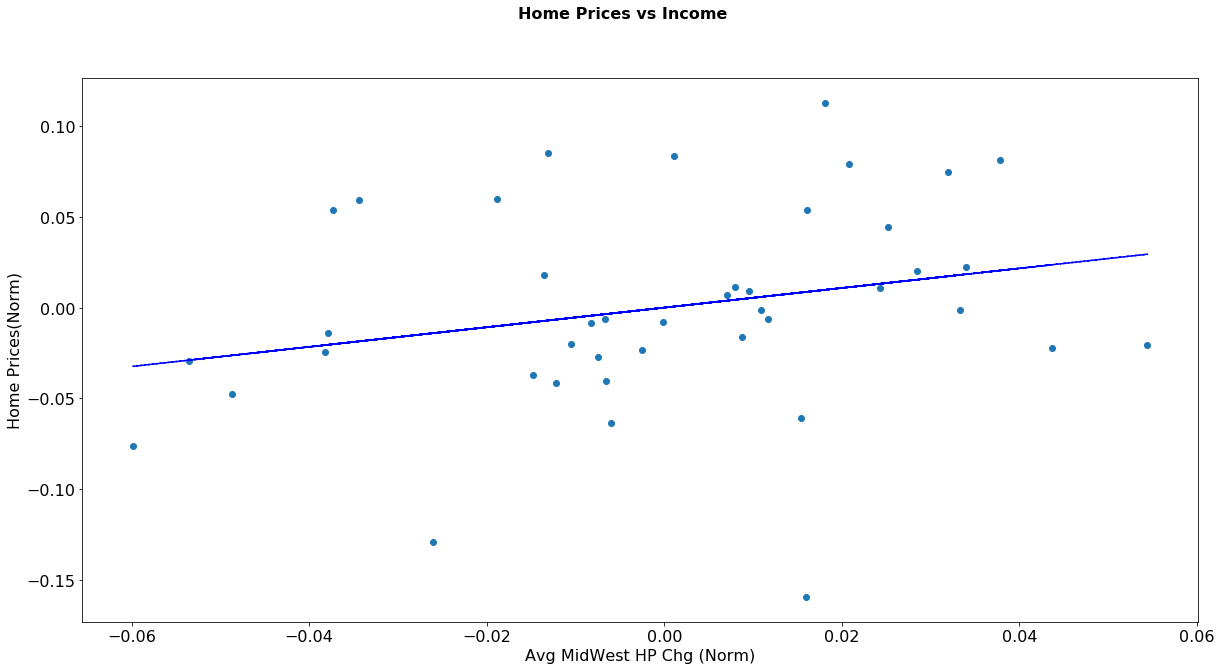

In [97]:
# Set data
x_axis = housing_v_income_region["MidWest Income Chg (Norm)"]
y_axis = housing_v_income_region["Avg MidWest HP Chg (Norm)"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Home Prices vs Income", fontsize=16, fontweight="bold")

# ax.set_xlim(0, 2750)
# ax.set_ylim(60000, 400000)

ax.set_xlabel("Avg MidWest HP Chg (Norm)")
ax.set_ylabel("Home Prices(Norm)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

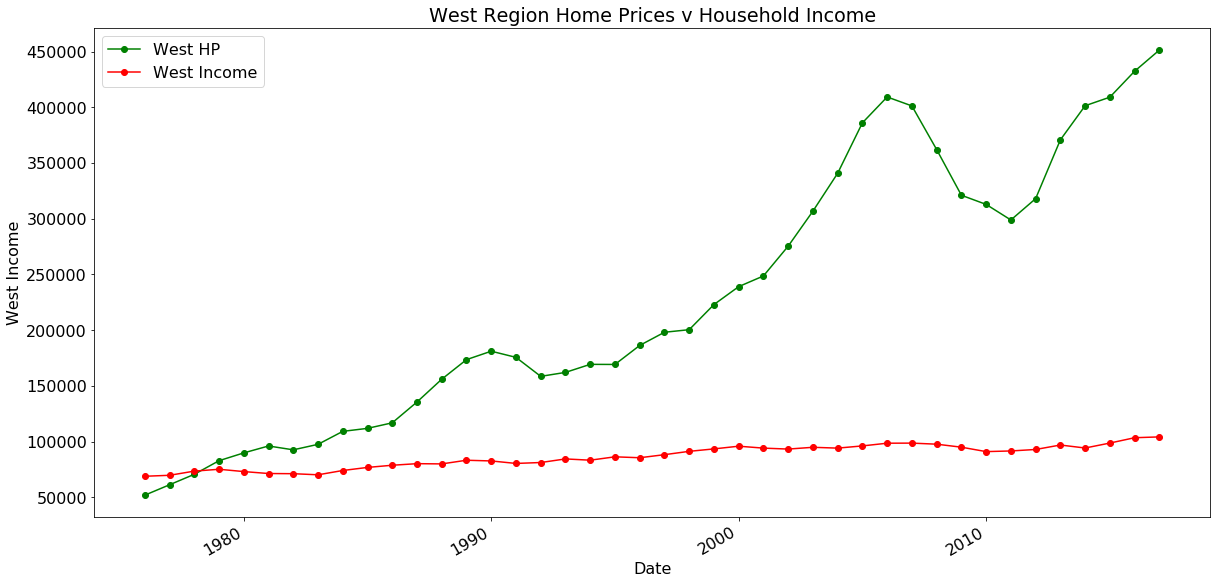

In [178]:
#WEST

# x = housing_v_income_region["Date"]
# y1 = housing_v_income_region["West HP"]
# y2 = housing_v_income_region["West Income"]

# fig = pylab.figure()
# ax1 = fig.add_subplot(111)
# ax2 = ax1.twinx()

# ax1.plot(x, y1, marker="+",color="blue", linewidth=1, label="Avg House Prices")
# ax2.plot(x, y2, marker="s", color="Red", linewidth=1, label="Unemployment Rate (%)")
# plt.title("West Region Home Prices v Household Income")

# fig.show()




plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# yearsFmt = mdates.DateFormatter('%Y')



fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("West Income")

WHP = housing_v_income_region["West HP"]
WI = housing_v_income_region["West Income"]


x_axis1 = housing_v_income_region["Date"]

WHP_trend = plt.plot(x_axis1,WHP,color='g',marker = "o")
WI_trend = plt.plot(x_axis1,WI,color='r',marker = "o")

fig1.autofmt_xdate()
plt.title("West Region Home Prices v Household Income")
plt.savefig("West Vs Income.jpg")

plt.legend(loc="best")

In [128]:
housing_v_income_region["West Income"].corr(housing_v_income_region["West HP"])

0.9430650391911549

In [99]:
stats.f_oneway(housing_v_income_region["West HP"], housing_v_income_region["West Income"])

F_onewayResult(statistic=57.668281607844655, pvalue=4.4266711954388435e-11)

In [100]:
stats.chisquare(housing_v_income_region["West HP"], housing_v_income_region["West Income"])

Power_divergenceResult(statistic=13891849.3810831, pvalue=0.0)

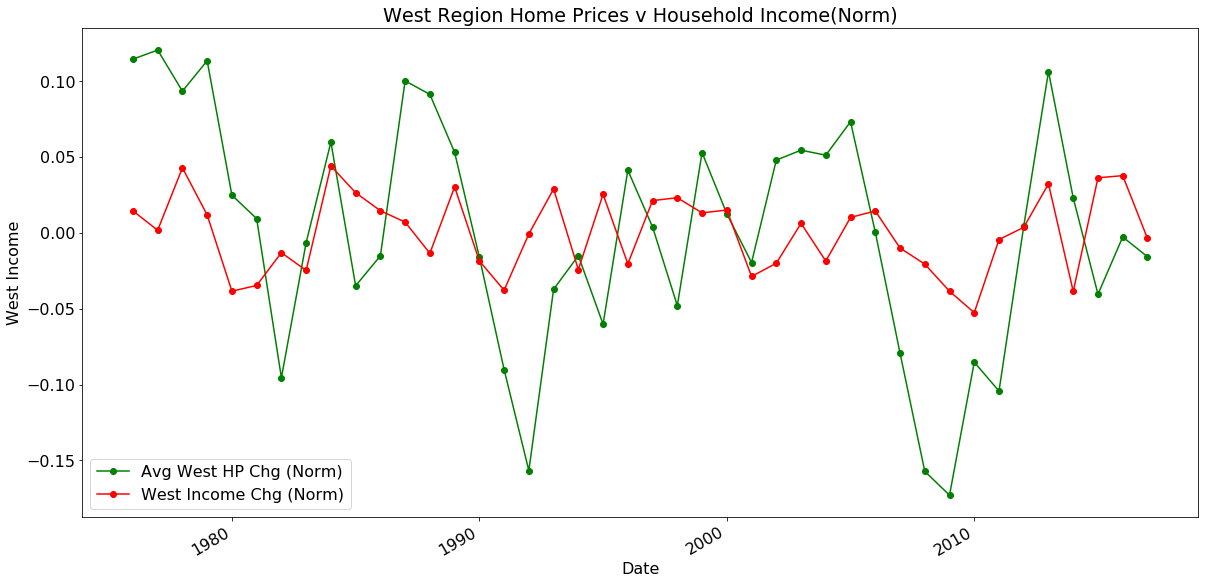

In [179]:
plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# yearsFmt = mdates.DateFormatter('%Y')


fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("West Income")
plt.title("West Region Home Prices(Norm) v Household Income (Norm)")

data_HPW = housing_v_income_region["Avg West HP Chg (Norm)"]
Inc_W = housing_v_income_region["West Income Chg (Norm)"]


x_axis1 = housing_v_income_region["Date"]

MWI_trend = plt.plot(x_axis1,data_HPW,color='g',marker = "o")
MWHP_trend = plt.plot(x_axis1,Inc_W,color='r',marker = "o")
plt.title("West Region Home Prices v Household Income(Norm)")
plt.savefig("West Vs Income(Norm).jpg")

fig1.autofmt_xdate()

plt.legend(loc="best")

In [127]:
housing_v_income_region["West Income Chg (Norm)"].corr(housing_v_income_region["Avg West HP Chg (Norm)"])

0.33453760202008065

In [102]:
linregress(housing_v_income_region["West Income Chg (Norm)"], housing_v_income_region["Avg West HP Chg (Norm)"])

LinregressResult(slope=0.9850140951176575, intercept=2.3452713823490827e-11, rvalue=0.3345376020200807, pvalue=0.03035367560889692, stderr=0.43872731850534)

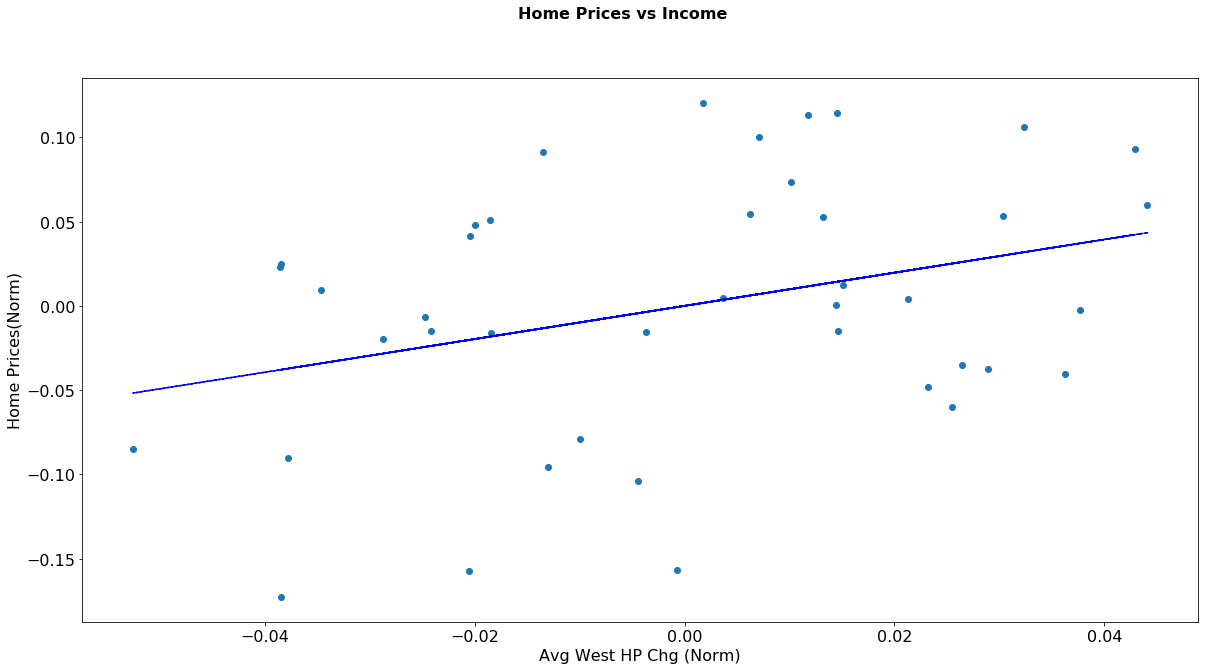

In [103]:
# Set data
x_axis = housing_v_income_region["West Income Chg (Norm)"]
y_axis = housing_v_income_region["Avg West HP Chg (Norm)"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Home Prices vs Income", fontsize=16, fontweight="bold")

# ax.set_xlim(0, 2750)
# ax.set_ylim(60000, 400000)

ax.set_xlabel("Avg West HP Chg (Norm)")
ax.set_ylabel("Home Prices(Norm)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

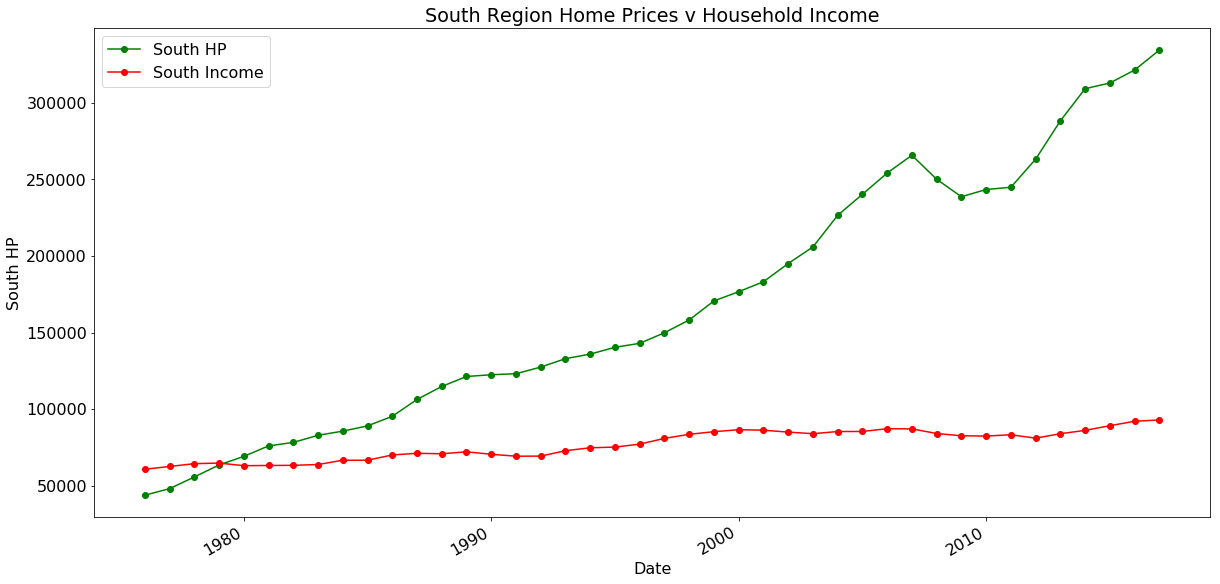

In [181]:

fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("South HP")

SHP = housing_v_income_region["South HP"]
SI = housing_v_income_region["South Income"]


x_axis1 = housing_v_income_region["Date"]

SHP_trend = plt.plot(x_axis1,SHP,color='g',marker = "o")
SI_trend = plt.plot(x_axis1,SI,color='r',marker = "o")
plt.title("South Region Home Prices v Household Income")
plt.savefig("South Vs Income(Norm).jpg")
fig1.autofmt_xdate()


plt.legend(loc="best")

In [129]:
housing_v_income_region["South Income"].corr(housing_v_income_region["South HP"])

0.9195335517729698

In [105]:
stats.f_oneway(housing_v_income_region["South HP"], housing_v_income_region["South Income"])

F_onewayResult(statistic=49.38628824933491, pvalue=5.672717170767781e-10)

In [106]:
stats.chisquare(housing_v_income_region["South HP"], housing_v_income_region["South Income"])

Power_divergenceResult(statistic=6895696.632259957, pvalue=0.0)

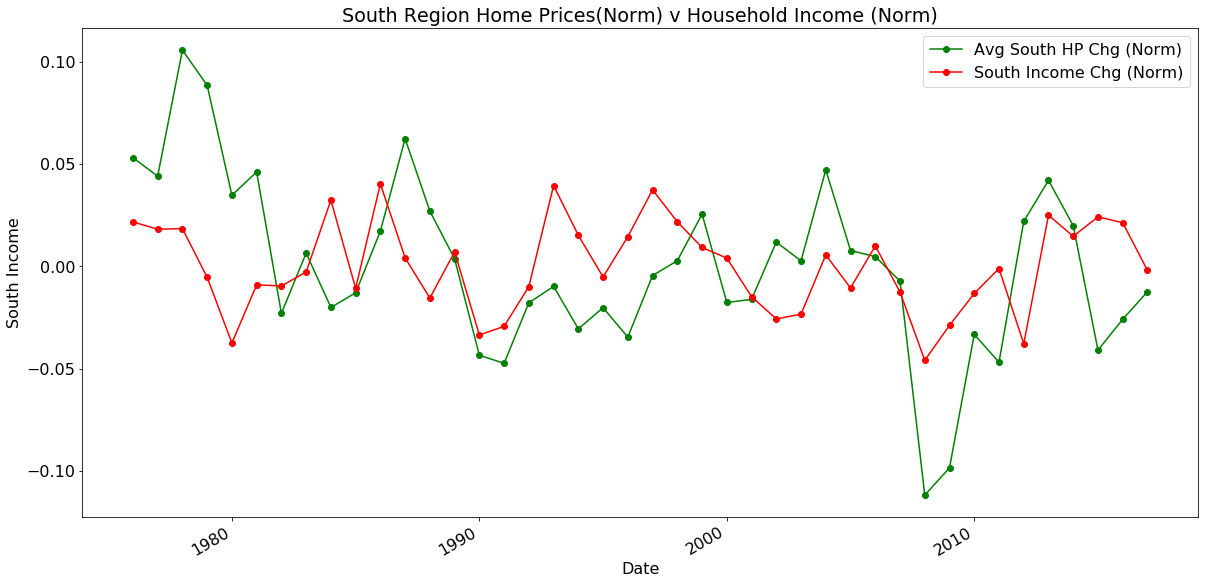

In [180]:
plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# yearsFmt = mdates.DateFormatter('%Y')


fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel("South Income")
plt.title("South Region Home Prices(Norm) v Household Income (Norm)")

data_HPW = housing_v_income_region["Avg South HP Chg (Norm)"]
Inc_W = housing_v_income_region["South Income Chg (Norm)"]


x_axis1 = housing_v_income_region["Date"]

MWI_trend = plt.plot(x_axis1,data_HPW,color='g',marker = "o")
MWHP_trend = plt.plot(x_axis1,Inc_W,color='r',marker = "o")
plt.savefig("South Vs Income(Norm).jpg")


fig1.autofmt_xdate()

plt.legend(loc="best")

In [130]:
housing_v_income_region["South Income Chg (Norm)"].corr(housing_v_income_region["Avg South HP Chg (Norm)"])

0.29477451905592733

In [108]:
linregress(housing_v_income_region["South Income Chg (Norm)"], housing_v_income_region["Avg South HP Chg (Norm)"])

LinregressResult(slope=0.5668184051145312, intercept=-1.1191560139718468e-10, rvalue=0.2947745190559273, pvalue=0.058085361044571175, stderr=0.29052604932233544)

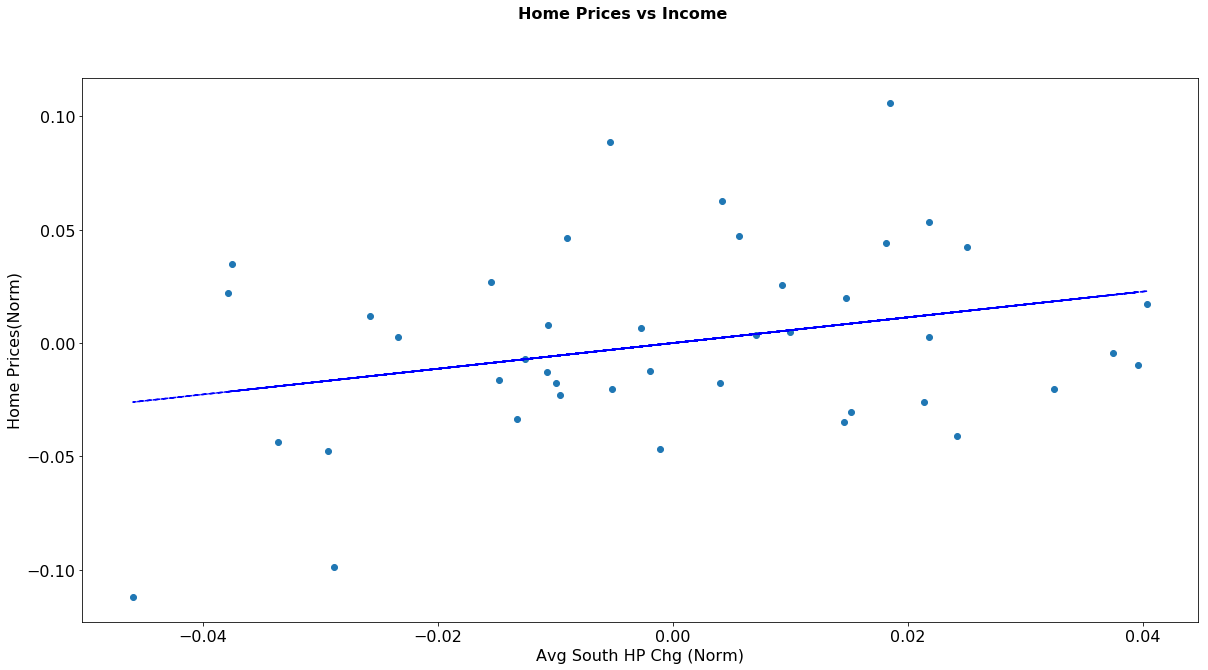

In [109]:
# Set data
x_axis = housing_v_income_region["South Income Chg (Norm)"]
y_axis = housing_v_income_region["Avg South HP Chg (Norm)"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Home Prices vs Income", fontsize=16, fontweight="bold")

# ax.set_xlim(0, 2750)
# ax.set_ylim(60000, 400000)

ax.set_xlabel("Avg South HP Chg (Norm)")
ax.set_ylabel("Home Prices(Norm)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

In [187]:
#All of US data 

housing_file_US = "housingincome_US.csv"
housing_v_income_US = pd.read_csv(housing_file_US)
housing_v_income_US.head()

,Date,AI,Avg HP,Avg US HP Chg,Annual Income Chg,Avg HP Chg (Norm),Income Chg (Norm)
0,1976,16870,44225,0.126034,0.085167,0.070020,0.034238
1,1977,18264,48900,0.105709,0.082632,0.049695,0.031703
2,1978,20091,55850,0.142127,0.100033,0.086113,0.049104
3,1979,22316,62750,0.123545,0.110746,0.067531,0.059818
4,1980,23974,64750,0.031873,0.074296,-0.024141,0.023368


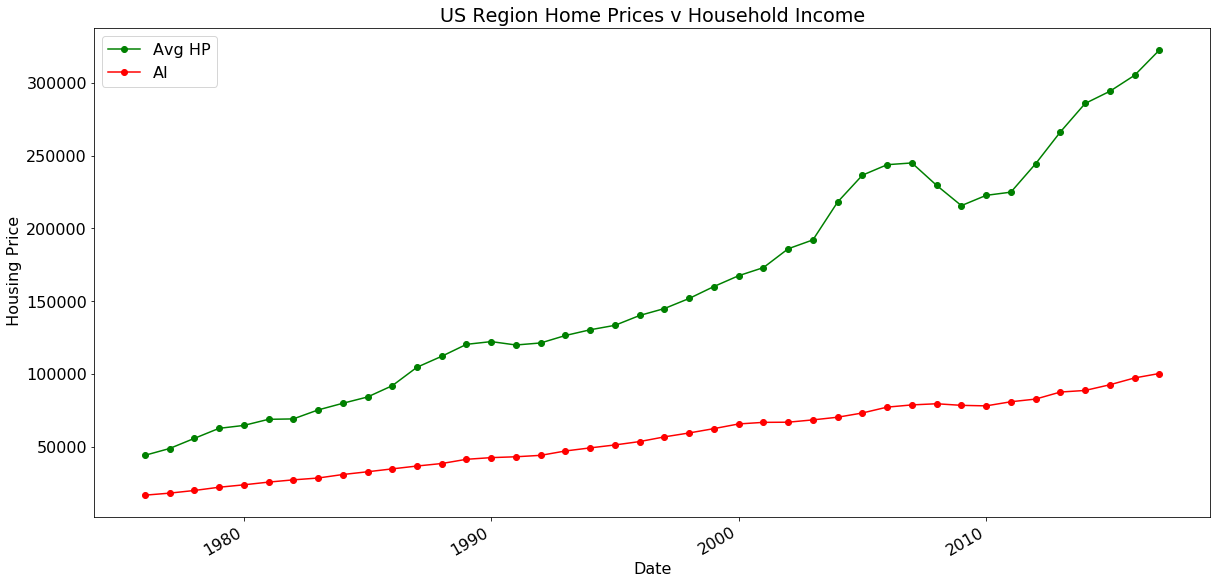

In [182]:
plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# yearsFmt = mdates.DateFormatter('%Y')


fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel(" Housing Price")
plt.title("US Region Home Prices v Household Income")

USHP = housing_v_income_US["Avg HP"]
USI = housing_v_income_US["AI"]


x_axis1 = housing_v_income_US["Date"]

USHP_trend = plt.plot(x_axis1,USHP,color='g',marker = "o")
USI_trend = plt.plot(x_axis1,USI,color='r',marker = "o")
plt.savefig("US Region Vs Income.jpg")

fig1.autofmt_xdate()
#plt.savefig("Images/NER VS NEI.png")

plt.legend(loc="best")

In [132]:
housing_v_income_US["AI"].corr(housing_v_income_US["Avg HP"])

0.9874363971778967

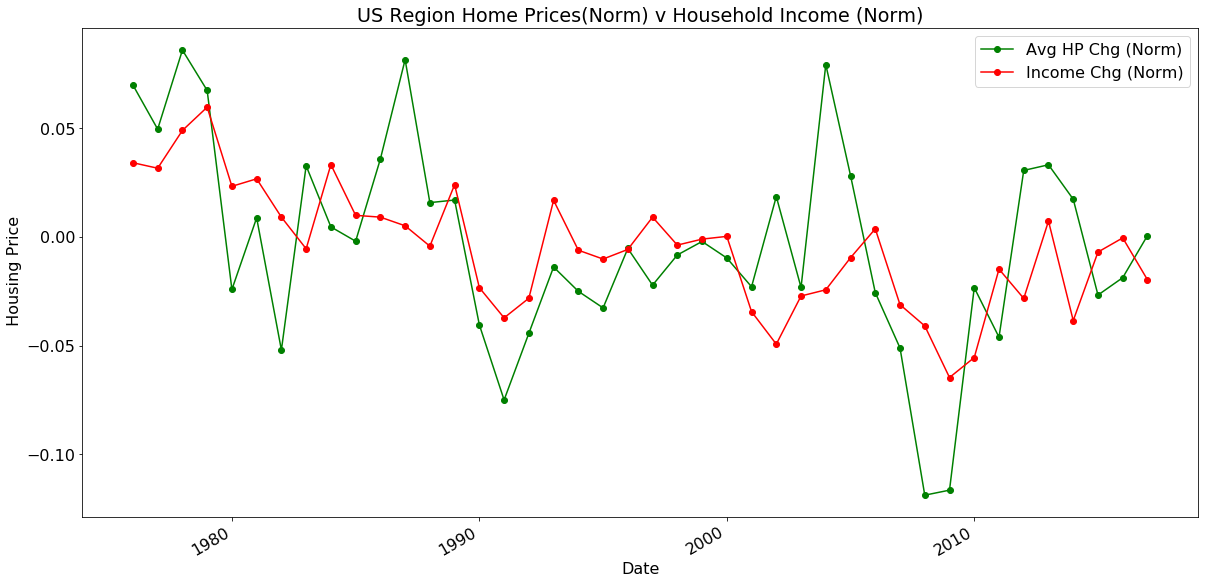

In [183]:
plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# yearsFmt = mdates.DateFormatter('%Y')


fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date")
ax1.set_ylabel(" Housing Price")
plt.title("US Region Home Prices(Norm) v Household Income (Norm)")

USHP = housing_v_income_US["Avg HP Chg (Norm)"]
USI = housing_v_income_US["Income Chg (Norm)"]


x_axis1 = housing_v_income_US["Date"]

USHP_trend = plt.plot(x_axis1,USHP,color='g',marker = "o")
USI_trend = plt.plot(x_axis1,USI,color='r',marker = "o")
plt.savefig("US Region Vs Income (Norm).jpg")

fig1.autofmt_xdate()
#plt.savefig("Images/NER VS NEI.png")

plt.legend(loc="best")

In [135]:
housing_v_income_US["Income Chg (Norm)"].corr(housing_v_income_US["Avg HP Chg (Norm)"])

0.562822727768101

In [133]:
linregress(housing_v_income_US["Income Chg (Norm)"], housing_v_income_US["Avg HP Chg (Norm)"])

LinregressResult(slope=0.9459648246106103, intercept=0.001282833811002056, rvalue=0.5628227277681012, pvalue=0.00010449563145163793, stderr=0.21966305152379784)

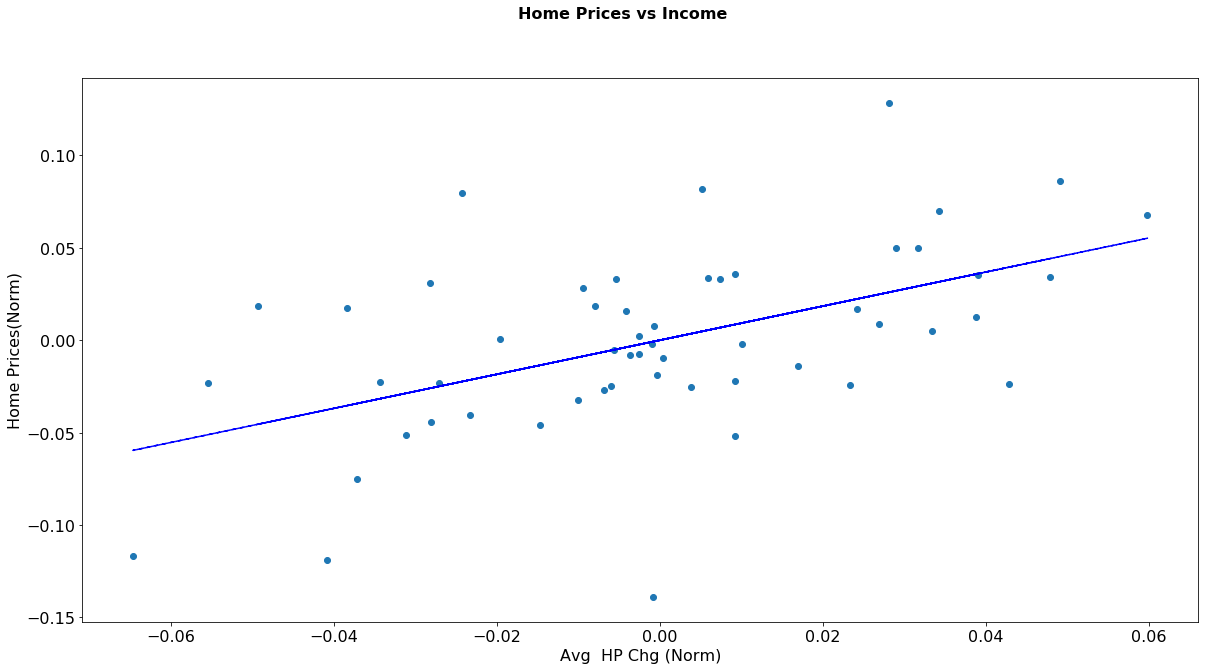

In [50]:
# Set data
x_axis = housing_v_income_US["Income Chg (Norm)"]
y_axis = housing_v_income_US["Avg HP Chg (Norm)"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Home Prices vs Income", fontsize=16, fontweight="bold")

# ax.set_xlim(0, 2750)
# ax.set_ylim(60000, 400000)

ax.set_xlabel("Avg  HP Chg (Norm)")
ax.set_ylabel("Home Prices(Norm)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')